# Q1

Given matrices A (n, k) and B (k, m),
$$
A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1k} \\
a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}
\quad \text{and} \quad
B = \begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1m} \\
b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
b_{k1} & b_{k2} & \cdots & b_{km}
\end{bmatrix}
$$

The resulting matrix $C = A * B$ will have elements $c_{ij}$ calculated as follows:

$$
C = \begin{bmatrix}
c_{11} & c_{12} & \cdots & c_{1m} \\
c_{21} & c_{22} & \cdots & c_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
c_{n1} & c_{n2} & \cdots & c_{nm}
\end{bmatrix}
$$

where each element $c_{ij}$ is given by:

\begin{equation*}
c_{ij} = \sum_{t=1}^{k} a_{it} b_{tj}
\end{equation*}

Thus, we can say that the element at the (i, j) position in C is obtained by taking the dot product of the $i^{th}$ row of A and the $j^{th}$ column of B.

To calculate each element of C, you perform $k$ multiplications and $k-1$ additions for the dot product. So, for each element in C, you need $k$ multiplications and $k-1$ additions.

In total there are $n$ rows and $m$ columns in the resulting matrix C, and thus the total number of multiplications is $n * m * k$, and the total number of additions is $n * m * (k-1)$.

# Q2

Note: I chose timeit because numpy's operations are so fast that using time.time() often displayed a measured time of 0 seconds, as the library is unreliable operations.

Here is a conversation on stack overflow regarding the same issue: https://stackoverflow.com/questions/22625957/using-time-time-to-time-a-function-often-return-0-seconds

Using the timeit module, we calculated the execution time of numpy's matrix multiplication by repeating the operation 10 times and calculating the average time per execution.


In [ ]:
import numpy as np
import timeit

# Set seed for reproducibility
np.random.seed(42)

# Generate random matrices A and B
A = np.random.randint(1, 11, size=(7, 9))
B = np.random.randint(1, 11, size=(9, 11))

print("Matrix A (7x9):")
print(A)
print("\nMatrix B (9x11):")
print(B)


Matrix A (7x9):
[[ 7  4  8  5  7 10  3  7  8]
 [ 5  4  8  8  3  6  5  2  8]
 [ 6  2  5  1 10  6  9  1 10]
 [ 3  7  4  9  3  5  3  7  5]
 [ 9  7  2  4  9  2 10  9 10]
 [ 5  2  4  7  8  3  1  4  2]
 [ 8  4  2  6  6 10  4  6  2]]

Matrix B (9x11):
[[10  2 10  4  8  7  9  8  5  2  5]
 [ 8 10  9  9  1  9  7  9  8  1  8]
 [ 8  3  1  8  3  3  1  5 10  7 10]
 [ 9  7  9  8  2  1  7  7  8  5  3]
 [ 8  6  3  1  3  5  3  1  5 10  7]
 [ 7  9 10 10  3  7  1  4  4  5  7]
 [ 7  4  7  3  6  2 10  9  5  6  4]
 [10  7  9  7  1  1  9  9  4  9  3]
 [ 7  6  8  9  5  1  3 10  8  6  8]]


In [ ]:

# List of lists approach for matrix multiplication
def matrix_multiply_list(A, B):
    m, n = len(A), len(A[0])
    nB, p = len(B), len(B[0])
    assert n == nB, "Number of columns in A must be equal to number of rows in B"

    # Initialize result matrix with zeros
    C = [[0] * p for _ in range(m)]

    # Perform matrix multiplication
    for i in range(m):
        for j in range(p):
            C[i][j] = sum(A[i][k] * B[k][j] for k in range(n))

    return C

# Generate matrices A and B as lists of lists
A_list = A.tolist()
B_list = B.tolist()

# Define wrapper functions for timeit
def time_list_multiplication():
    matrix_multiply_list(A_list, B_list)

def time_numpy_multiplication():
    np.dot(A, B)

# Measure time using timeit
time_list = timeit.timeit(time_list_multiplication, number=1000)
time_numpy = timeit.timeit(time_numpy_multiplication, number=1000)

# Multiply matrices once to display the result
C_list = matrix_multiply_list(A_list, B_list)
C_numpy = np.dot(A, B)

# Convert C_list to NumPy array for comparison
C_list_np = np.array(C_list)

# Assert that both results are the same
assert np.allclose(C_list_np, C_numpy), "The results are not the same!"

# Print the resulting matrix once
print("\nMatrix C (7x11):")
print(C_list_np)

# Print the time taken for each method
print(f"Time taken (list of lists) over 1000 runs: {time_list} seconds")
print(f"Time taken (NumPy) over 1000 runs: {time_numpy} seconds")



Matrix C (7x11):
[[484 354 428 405 210 240 282 384 369 348 378]
 [395 284 352 348 183 180 244 342 337 266 314]
 [390 271 334 284 220 197 245 322 307 307 330]
 [384 305 361 335 135 173 265 333 301 252 267]
 [514 357 469 359 245 234 400 461 372 360 357]
 [307 210 248 213 121 141 191 212 226 224 211]
 [402 300 388 310 174 220 272 308 270 264 272]]
Time taken (list of lists) over 1000 runs: 0.07679479999933392 seconds
Time taken (NumPy) over 1000 runs: 0.0017106000013882294 seconds


## Comparing the performance of matrix multiplication using list of lists and numpy

Size: 50x50
Time taken using list of lists: 0.011941780 seconds
Time taken using numpy: 0.000023695 seconds
Numpy is 503.98 times faster than list of lists
Results are identical: True

Size: 100x100
Time taken using list of lists: 0.085965310 seconds
Time taken using numpy: 0.000034855 seconds
Numpy is 2466.37 times faster than list of lists
Results are identical: True

Size: 150x150
Time taken using list of lists: 0.277536220 seconds
Time taken using numpy: 0.000194355 seconds
Numpy is 1427.99 times faster than list of lists
Results are identical: True

Size: 200x200
Time taken using list of lists: 0.692060020 seconds
Time taken using numpy: 0.000190160 seconds
Numpy is 3639.36 times faster than list of lists
Results are identical: True

Size: 250x250
Time taken using list of lists: 1.604902865 seconds
Time taken using numpy: 0.000328985 seconds
Numpy is 4878.35 times faster than list of lists
Results are identical: True

Size: 300x300
Time taken using list of lists: 2.873259740 secon

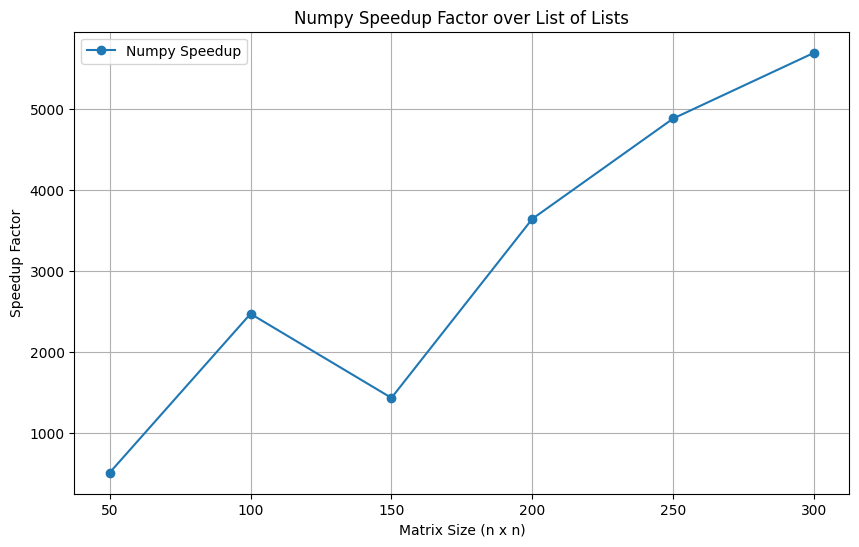

In [ ]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

# Function to multiply matrices using list of lists
def matrix_multiply_list_of_lists(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])

    # Initialize the result matrix with zeros
    C = [[0 for _ in range(m)] for _ in range(n)]

    # Perform multiplication
    for i in range(n):
        for j in range(m):
            for t in range(k):
                C[i][j] += A[i][t] * B[t][j]

    return C

# Function to multiply matrices using numpy
def matrix_multiply_numpy(A, B):
    return np.dot(A, B)

# Function to compare the timings for different sizes
def compare_timings(sizes):
    times_list_of_lists = []
    times_numpy = []
    speedups = []

    for size in sizes:
        n, k, m = size, size, size

        # Create sample matrices A (n, k) and B (k, m)
        A = np.random.rand(n, k).tolist()  # Convert to list of lists
        B = np.random.rand(k, m).tolist()  # Convert to list of lists

        # Timing numpy multiplication
        A_np = np.array(A)
        B_np = np.array(B)

        def numpy_multiply():
            np.dot(A_np, B_np)

        # Timing list of lists multiplication
        def list_of_lists_multiply():
            matrix_multiply_list_of_lists(A, B)

        time_numpy = timeit.timeit(numpy_multiply, number=20) / 20
        times_numpy.append(time_numpy)

        time_list_of_lists = timeit.timeit(list_of_lists_multiply, number=20) / 20
        times_list_of_lists.append(time_list_of_lists)

        speedup = time_list_of_lists / time_numpy
        speedups.append(speedup)

        print(f"Size: {size}x{size}")
        print(f"Time taken using list of lists: {time_list_of_lists:.9f} seconds")
        print(f"Time taken using numpy: {time_numpy:.9f} seconds")
        print(f"Numpy is {speedup:.2f} times faster than list of lists")
        print("Results are identical:", np.allclose(np.array(matrix_multiply_list_of_lists(A, B)), np.dot(A_np, B_np)))
        print()

    return sizes, times_list_of_lists, times_numpy, speedups

# List of sizes to test
sizes = [50, 100, 150, 200, 250, 300]

# Compare timings
sizes, times_list_of_lists, times_numpy, speedups = compare_timings(sizes)

# Plotting the speedup results
plt.figure(figsize=(10, 6))
plt.plot(sizes, speedups, label='Numpy Speedup', marker='o')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Speedup Factor')
plt.title('Numpy Speedup Factor over List of Lists')
plt.legend()
plt.grid(True)
plt.show()


## Reasons why numpy is faster:

### Vectorization

Numpy performs operations on entire arrays using vectorization, which leverages optimized low-level implementations and SIMD instructions to process multiple data points in a single CPU cycle.

### Optimized Libraries

Numpy uses highly optimized, compiled libraries such as BLAS and LAPACK for linear algebra operations, providing significant speed improvements over pure Python implementations.

### Memory Efficiency

Numpy arrays are stored in contiguous blocks of memory, enhancing cache efficiency and minimizing memory access overhead compared to the scattered memory layout of lists of lists. Lists can have different data types while numpy arrays only has the same data type, which is yet another reason it is so fast, as it need not do type checking for every calculation.

### Avoiding Python Overhead

Numpy operations are executed in compiled code, bypassing the Python interpreter and its dynamic typing overhead, resulting in faster execution than native Python loops.

### Parallelism

Numpy can leverage multi-threading and parallelism in underlying libraries, effectively utilizing multiple CPU cores to further accelerate computations.

A good reference on why numpy is faster, as explained in the documentation: https://numpy.org/doc/2.0/dev/underthehood.html


# Q3

## Described Method

Finding the highest element in a list requires $O(n)$ time. Finding the second highest requires another pass through the list, which is also $O(n)$. To find the median using this method, we would need to perform these steps for half of the list (if the list has $n$ elements, we need to find the $ \frac{n}{2}$ th largest element).

Therefore, the time complexity for finding the median using this iterative method is:
$$
O(n) + O(n) + \ldots + O(n)
$$
which is performed $\frac{n}{2}$ times. This results in a total time complexity of:
$$
O\left(\frac{n}{2} \cdot n\right) = O(n^2)
$$

## Merge Sort Method

A more efficient method to find the median is to sort the list first using an efficient sorting algorithm like Merge Sort, which has a time complexity of $O(n \log n)$. After sorting, the median can be found directly in constant time $O(1)$, as it is the $\frac{n}{2}$ th element in the sorted list, or the average of the $\frac{n}{2}$ th and $\frac{n}{2}+1$  th elements if n is even.

Therefore, the time complexity for finding the median using Merge Sort is:
$
O(n \log n)
$


In [1]:
# Iterative method

def find_kth_largest(arr, k):
    for i in range(k):
        max_index = 0
        for j in range(1, len(arr)):
            if arr[j] > arr[max_index]:
                max_index = j
        arr[max_index], arr[-1] = arr[-1], arr[max_index]
        arr = arr[:-1]
    return arr[-1]

def find_median_iterative(arr):
    n = len(arr)
    k = n // 2
    if n % 2 == 1:
        return find_kth_largest(arr[:], k + 1)
    else:
        return 0.5 * (find_kth_largest(arr[:], k) + find_kth_largest(arr[:], k + 1))

# Merge sort method

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

def find_median_merge_sort(arr):
    sorted_arr = merge_sort(arr[:])
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return 0.5 * (sorted_arr[n // 2 - 1] + sorted_arr[n // 2])


# Numpy method

import numpy as np

def find_median_numpy(arr):
    return np.median(arr)


In [ ]:
import numpy as np
import timeit

# Generate a large random list
np.random.seed(42)
arr = np.random.randint(1, 10000, size=1000)

# Define wrapper functions for timeit
def time_iterative_median():
    find_median_iterative(arr)

def time_merge_sort_median():
    find_median_merge_sort(arr)

def time_numpy_median():
    find_median_numpy(arr)

# Measure time using timeit
time_iterative = timeit.timeit(time_iterative_median, number=100)
time_merge_sort = timeit.timeit(time_merge_sort_median, number=100)
time_numpy = timeit.timeit(time_numpy_median, number=100)

# Print the time taken for each method
print(f"Time taken (iterative): {time_iterative} seconds")
print(f"Time taken (merge sort): {time_merge_sort} seconds")
print(f"Time taken (NumPy): {time_numpy} seconds")


Time taken (iterative): 9.966815200008568 seconds
Time taken (merge sort): 0.2645342000032542 seconds
Time taken (NumPy): 0.0017417999915778637 seconds


# Q4


To find the gradient of the function $ f(x, y) = x^2 y + y^3 \sin(x) $ with respect to $ x $ and $ y $, we compute the partial derivatives of $ f $ with respect to $ x $ and $ y $:

The partial derivative of $ f $ with respect to $ x $ is:
$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (x^2 y + y^3 \sin(x)) = 2xy + y^3 \cos(x)
$$

The partial derivative of $ f $ with respect to $ y $ is:
$$
\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (x^2 y + y^3 \sin(x)) = x^2 + 3y^2 \sin(x)
$$

Therefore, the gradient of $ f $ is:
$$
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left(2xy + y^3 \cos(x), x^2 + 3y^2 \sin(x)\right)
$$



# Q5

In [5]:
# Using JAX

import jax
import jax.numpy as jnp

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute the gradient using JAX
gradient_f = jax.grad(f, argnums=(0, 1))

# Test the gradient with a few random values
x, y = 1.0, 2.0  # example values
print("Example values: x=1, y=2")
grad_x, grad_y = gradient_f(x, y)
print("Using JAX:")
print("Gradient with respect to x:", grad_x)
print("Gradient with respect to y:", grad_y)

# Expected analytical gradients for comparison
analytical_grad_x = 2 * x * y + y**3 * jnp.cos(x)
analytical_grad_y = x**2 + 3 * y**2 * jnp.sin(x)

print("Analytical gradient with respect to x:", analytical_grad_x)
print("Analytical gradient with respect to y:", analytical_grad_y)


Example values: x=1, y=2
Using JAX:
Gradient with respect to x: 8.322418
Gradient with respect to y: 11.0976515
Analytical gradient with respect to x: 8.322418
Analytical gradient with respect to y: 11.0976515


# Q6

In [4]:
# Using sympy

import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient
grad_f = [sp.diff(f, var) for var in (x, y)]
print("Using SymPy:")
print("Gradient with respect to x:", grad_f[0])
print("Gradient with respect to y:", grad_f[1])

# Evaluate the gradient at specific points
grad_f_eval = [grad.subs({x: 1, y: 2}) for grad in grad_f]
print("Evaluated gradient at (x=1, y=2):", grad_f_eval)



Using SymPy:
Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)
Evaluated gradient at (x=1, y=2): [4 + 8*cos(1), 1 + 12*sin(1)]


# Q7

In [ ]:
# Nested dictionary to represent the hierarchical information

students_records = {
    2022: {
        'Branch 1': {
            1: {
                'Name': 'Alice',
                'Marks': {
                    'Maths': 100,
                    'English': 70,
                    'Science': 80
                }
            },
            2: {
                'Name': 'Bob',
                'Marks': {
                    'Maths': 90,
                    'English': 85,
                    'Science': 75
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Charlie',
                'Marks': {
                    'Maths': 88,
                    'English': 76,
                    'Science': 90
                }
            }
        }
    },
    2023: {
        'Branch 1': {
            1: {
                'Name': 'David',
                'Marks': {
                    'Maths': 95,
                    'English': 89,
                    'Science': 92
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Eve',
                'Marks': {
                    'Maths': 78,
                    'English': 82,
                    'Science': 85
                }
            }
        }
    },
    2024: {
        'Branch 1': {
            1: {
                'Name': 'Frank',
                'Marks': {
                    'Maths': 85,
                    'English': 80,
                    'Science': 88
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Grace',
                'Marks': {
                    'Maths': 90,
                    'English': 92,
                    'Science': 95
                }
            }
        }
    },
    2025: {
        'Branch 1': {
            1: {
                'Name': 'Hannah',
                'Marks': {
                    'Maths': 88,
                    'English': 85,
                    'Science': 87
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Ian',
                'Marks': {
                    'Maths': 91,
                    'English': 86,
                    'Science': 89
                }
            }
        }
    }
}

# Print the hierarchical information
for year, branches in students_records.items():
    print(f"Year: {year}")
    for branch, students in branches.items():
        print(f"  {branch}:")
        for roll_number, student_info in students.items():
            print(f"    Roll Number: {roll_number}")
            print(f"      Name: {student_info['Name']}")
            print(f"      Marks:")
            for subject, marks in student_info['Marks'].items():
                print(f"        {subject}: {marks}")


Year: 2022
  Branch 1:
    Roll Number: 1
      Name: Alice
      Marks:
        Maths: 100
        English: 70
        Science: 80
    Roll Number: 2
      Name: Bob
      Marks:
        Maths: 90
        English: 85
        Science: 75
  Branch 2:
    Roll Number: 1
      Name: Charlie
      Marks:
        Maths: 88
        English: 76
        Science: 90
Year: 2023
  Branch 1:
    Roll Number: 1
      Name: David
      Marks:
        Maths: 95
        English: 89
        Science: 92
  Branch 2:
    Roll Number: 1
      Name: Eve
      Marks:
        Maths: 78
        English: 82
        Science: 85
Year: 2024
  Branch 1:
    Roll Number: 1
      Name: Frank
      Marks:
        Maths: 85
        English: 80
        Science: 88
  Branch 2:
    Roll Number: 1
      Name: Grace
      Marks:
        Maths: 90
        English: 92
        Science: 95
Year: 2025
  Branch 1:
    Roll Number: 1
      Name: Hannah
      Marks:
        Maths: 88
        English: 85
        Science: 87
  Branch

# Q8

In [ ]:
# Python classes

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return (f"Roll Number: {self.roll_number}, Name: {self.name}, "
                f"Marks: {self.marks}")


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return (f"Branch: {self.name}, Students: {self.students}")


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return (f"Year: {self.year}, Branches: {self.branches}")


class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database: {self.years}"


# Create the database
db = Database()

# Add data to the database
year_2022 = Year(2022)
branch_1_2022 = Branch('Branch 1')
branch_1_2022.add_student(Student(1, 'Alice', {'Maths': 100, 'English': 70, 'Science': 80}))
branch_1_2022.add_student(Student(2, 'Bob', {'Maths': 90, 'English': 85, 'Science': 75}))
branch_2_2022 = Branch('Branch 2')
branch_2_2022.add_student(Student(1, 'Charlie', {'Maths': 88, 'English': 76, 'Science': 90}))
year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

year_2023 = Year(2023)
branch_1_2023 = Branch('Branch 1')
branch_1_2023.add_student(Student(1, 'David', {'Maths': 95, 'English': 89, 'Science': 92}))
branch_2_2023 = Branch('Branch 2')
branch_2_2023.add_student(Student(1, 'Eve', {'Maths': 78, 'English': 82, 'Science': 85}))
year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)

year_2024 = Year(2024)
branch_1_2024 = Branch('Branch 1')
branch_1_2024.add_student(Student(1, 'Frank', {'Maths': 85, 'English': 80, 'Science': 88}))
branch_2_2024 = Branch('Branch 2')
branch_2_2024.add_student(Student(1, 'Grace', {'Maths': 90, 'English': 92, 'Science': 95}))
year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)

year_2025 = Year(2025)
branch_1_2025 = Branch('Branch 1')
branch_1_2025.add_student(Student(1, 'Hannah', {'Maths': 88, 'English': 85, 'Science': 87}))
branch_2_2025 = Branch('Branch 2')
branch_2_2025.add_student(Student(1, 'Ian', {'Maths': 91, 'English': 86, 'Science': 89}))
year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)

db.add_year(year_2022)
db.add_year(year_2023)
db.add_year(year_2024)
db.add_year(year_2025)

# Print the hierarchical information
print(db)


Database: [Year: 2022, Branches: [Branch: Branch 1, Students: [Roll Number: 1, Name: Alice, Marks: {'Maths': 100, 'English': 70, 'Science': 80}, Roll Number: 2, Name: Bob, Marks: {'Maths': 90, 'English': 85, 'Science': 75}], Branch: Branch 2, Students: [Roll Number: 1, Name: Charlie, Marks: {'Maths': 88, 'English': 76, 'Science': 90}]], Year: 2023, Branches: [Branch: Branch 1, Students: [Roll Number: 1, Name: David, Marks: {'Maths': 95, 'English': 89, 'Science': 92}], Branch: Branch 2, Students: [Roll Number: 1, Name: Eve, Marks: {'Maths': 78, 'English': 82, 'Science': 85}]], Year: 2024, Branches: [Branch: Branch 1, Students: [Roll Number: 1, Name: Frank, Marks: {'Maths': 85, 'English': 80, 'Science': 88}], Branch: Branch 2, Students: [Roll Number: 1, Name: Grace, Marks: {'Maths': 90, 'English': 92, 'Science': 95}]], Year: 2025, Branches: [Branch: Branch 1, Students: [Roll Number: 1, Name: Hannah, Marks: {'Maths': 88, 'English': 85, 'Science': 87}], Branch: Branch 2, Students: [Roll Nu

# Q9

The plots are as follows:

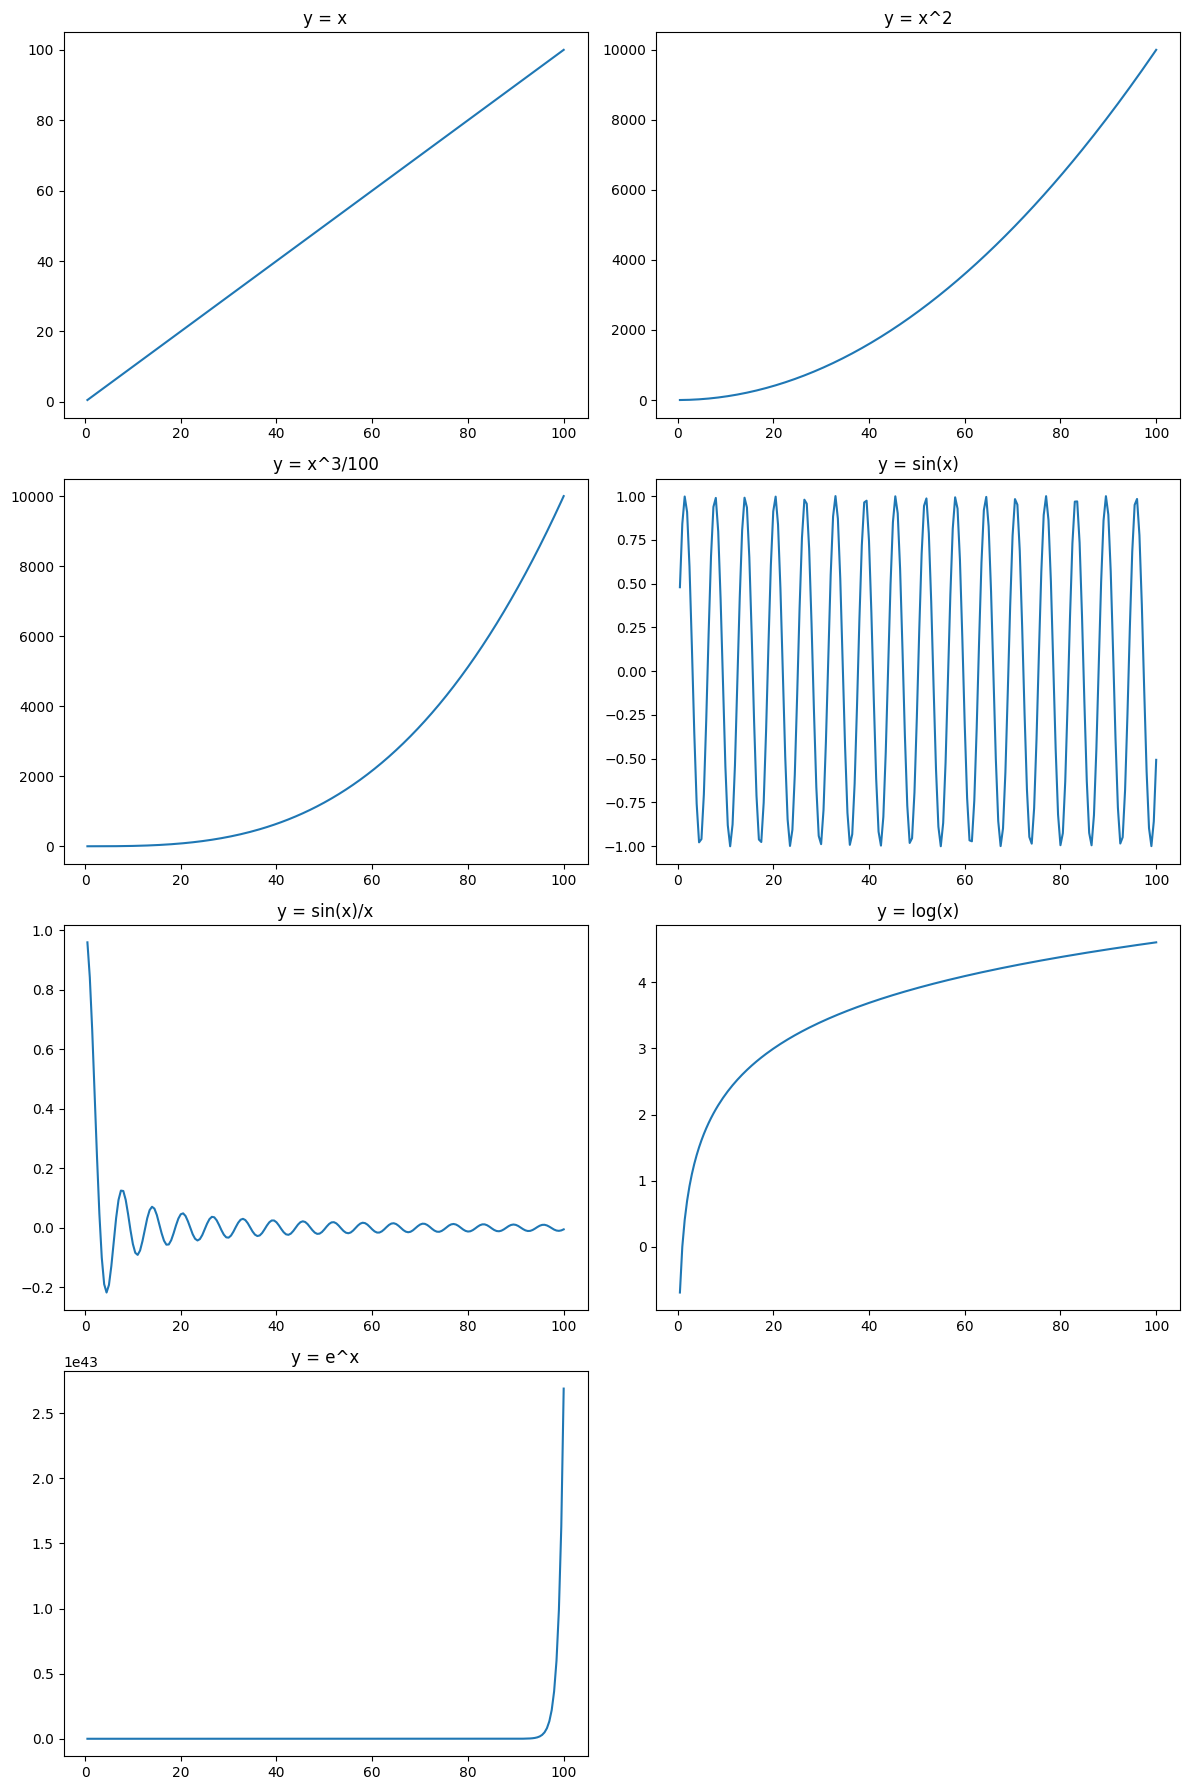

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.5, 0.5)

# Define the functions
def func1(x):
    return x

def func2(x):
    return x**2

def func3(x):
    return x**3 / 100

def func4(x):
    return np.sin(x)

def func5(x):
    return np.sin(x) / x

def func6(x):
    return np.log(x)

def func7(x):
    return np.exp(x)

# Plotting
plt.figure(figsize=(12, 18))

# Plot function 1
plt.subplot(4, 2, 1)
plt.plot(x_values, func1(x_values))
plt.title('y = x')

# Plot function 2
plt.subplot(4, 2, 2)
plt.plot(x_values, func2(x_values))
plt.title('y = x^2')

# Plot function 3
plt.subplot(4, 2, 3)
plt.plot(x_values, func3(x_values))
plt.title('y = x^3/100')

# Plot function 4
plt.subplot(4, 2, 4)
plt.plot(x_values, func4(x_values))
plt.title('y = sin(x)')

# Plot function 5
plt.subplot(4, 2, 5)
plt.plot(x_values, func5(x_values))
plt.title('y = sin(x)/x')

# Plot function 6
plt.subplot(4, 2, 6)
plt.plot(x_values, func6(x_values))
plt.title('y = log(x)')

# Plot function 7
plt.subplot(4, 2, 7)
plt.plot(x_values, func7(x_values))
plt.title('y = e^x')

plt.tight_layout()
plt.show()


# Q10

In [ ]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers in the range [1, 2)
# Using np.random.uniform to draw random numbers uniformly from 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame from the generated matrix
# Naming the columns of the DataFrame as 'a', 'b', 'c', 'd', 'e'
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Calculate the standard deviation for each column
# Find the column with the highest standard deviation using idxmax()
column_with_highest_std = df.std().idxmax()

# Calculate the mean for each row
# Find the row with the lowest mean using idxmin()
row_with_lowest_mean = df.mean(axis=1).idxmin()

# Display the generated DataFrame
print("Generated DataFrame:")
print(df)

# Display the column with the highest standard deviation
print("\nColumn with the highest standard deviation:", column_with_highest_std)

# Display the row with the lowest mean
print("Row with the lowest mean:", row_with_lowest_mean)


Generated DataFrame:
           a         b         c         d         e
0   1.529481  1.577073  1.426821  1.368436  1.450475
1   1.720030  1.793609  1.030449  1.395350  1.882165
2   1.623953  1.450997  1.744498  1.760757  1.999266
3   1.364986  1.877524  1.497498  1.056099  1.784723
4   1.443126  1.399902  1.688824  1.856834  1.088179
5   1.517926  1.081308  1.776764  1.720227  1.014095
6   1.026303  1.931559  1.491080  1.009438  1.954632
7   1.887273  1.644683  1.879080  1.839772  1.876409
8   1.503372  1.755993  1.118648  1.028173  1.081404
9   1.449760  1.830194  1.367633  1.679867  1.348170
10  1.249595  1.384111  1.375297  1.432532  1.513650
11  1.174001  1.975316  1.994520  1.479729  1.270205
12  1.154146  1.422419  1.143914  1.871926  1.688744
13  1.407598  1.400219  1.846512  1.652316  1.775321
14  1.163059  1.581528  1.642938  1.485653  1.587432
15  1.653390  1.150557  1.385286  1.936714  1.661993
16  1.815473  1.694280  1.140276  1.826526  1.016650
17  1.632926  1.551140  1

# Q11

In [ ]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers in the range [1, 2)
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Add a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" based on conditions
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in column "g" is "LT8"
count_LT8 = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation of column "f" for rows where the value in column "g" is "LT8" and "GT8" respectively
std_dev_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_dev_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()

# Display the modified DataFrame
print("Modified DataFrame:")
print(df)

# Display results
print("\nNumber of rows where the value in column 'g' is 'LT8':", count_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_dev_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_dev_GT8)


Modified DataFrame:
           a         b         c         d         e         f    g
0   1.597193  1.829897  1.143526  1.504282  1.586139  7.661038  LT8
1   1.258069  1.014510  1.740535  1.873169  1.113209  6.999492  LT8
2   1.308580  1.171813  1.971034  1.871140  1.598006  7.920573  LT8
3   1.980295  1.444194  1.248485  1.985609  1.604824  8.263407  GT8
4   1.348036  1.042252  1.522800  1.909406  1.021656  6.844151  LT8
5   1.729482  1.295715  1.118407  1.219945  1.587159  6.950709  LT8
6   1.636687  1.303085  1.559292  1.404020  1.085645  6.988729  LT8
7   1.577681  1.932624  1.932440  1.142645  1.615271  8.200661  GT8
8   1.343925  1.170417  1.977049  1.009587  1.335270  6.836248  LT8
9   1.152174  1.323152  1.985069  1.280330  1.677775  7.418501  LT8
10  1.078852  1.075314  1.978647  1.230919  1.521332  6.885065  LT8
11  1.667046  1.846479  1.727731  1.730077  1.247760  8.219094  GT8
12  1.937253  1.284380  1.663435  1.936833  1.871552  8.693454  GT8
13  1.711741  1.374022  1.24

# Q12

Broadcasting in NumPy is a technique that allows arrays of different shapes to be used together in arithmetic operations. When performing operations, NumPy automatically expands the smaller array along the missing dimensions to match the shape of the larger array. This enables efficient computation without the need to manually reshape or replicate arrays.

In [ ]:
import numpy as np

# Example 1: Broadcasting a 1D array to a 2D array (matrix)
print("Example 1:")
# 3x3 matrix
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 1D array with 3 elements
vector = np.array([1, 2, 3])

# Broadcasting the vector to each row of the matrix
result = matrix + vector

print("Original Matrix:")
print(matrix)

print("Vector:")
print(vector)

print("Result after broadcasting the vector to each row of the matrix:")
print(result)
print()

Example 1:
Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Vector:
[1 2 3]
Result after broadcasting the vector to each row of the matrix:
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]



In [ ]:
# Example 2: Broadcasting a scalar to a 2D array (matrix)
print("Example 2:")
# 3x3 matrix
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Scalar value
scalar = 5

# Broadcasting the scalar to each element of the matrix
result = matrix + scalar

print("Original Matrix:")
print(matrix)

print("Scalar:")
print(scalar)

print("Result after broadcasting the scalar to each element of the matrix:")
print(result)
print()



Example 2:
Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Scalar:
5
Result after broadcasting the scalar to each element of the matrix:
[[ 6  7  8]
 [ 9 10 11]
 [12 13 14]]



In [ ]:

# Example 3: Broadcasting a 1D array to a 2D array along columns
print("Example 3:")
# 3x1 column vector
column_vector = np.array([[1], [2], [3]])

# 1D array with 3 elements
vector = np.array([1, 2, 3])

# Broadcasting the column vector to each column of the matrix
result = column_vector + vector

print("Column Vector:")
print(column_vector)

print("Vector:")
print(vector)

print("Result after broadcasting the column vector to each column of the matrix:")
print(result)
print()

Example 3:
Column Vector:
[[1]
 [2]
 [3]]
Vector:
[1 2 3]
Result after broadcasting the column vector to each column of the matrix:
[[2 3 4]
 [3 4 5]
 [4 5 6]]



In [ ]:
# Example 4: Broadcasting a 1D array to a 2D array (incompatible shapes)
print("Example 4:")
# 3x3 matrix
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 1D array with 2 elements (incompatible shape)
vector = np.array([1, 2])

print("Original Matrix:")
print(matrix)

print("Vector:")
print(vector)

try:
    # Attempting to broadcast (will raise an error)
    result = matrix + vector
    print("Result after attempting to broadcast the vector to the matrix:")
    print(result)
except ValueError as e:
    print("Error:", e)
print()

Example 4:
Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Vector:
[1 2]
Error: operands could not be broadcast together with shapes (3,3) (2,) 



# Q13

The argmin function in NumPy is used to find the index of the minimum element in an array. When you call np.argmin on an array, it returns the index of the first occurrence of the minimum value in that array.

In [ ]:
import numpy as np

def compute_argmin(arr):
    # Initialize the index of the minimum element
    min_index = 0
    # Initialize the minimum value
    min_value = arr[0]

    # Iterate through the array to find the minimum value and its index
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

# Test the function with an example array
example_array = np.array([10, 3, 5, 1, 12, 7, 6])

# Compute the argmin using the custom function
custom_argmin = compute_argmin(example_array)

# Compute the argmin using np.argmin for verification
numpy_argmin = np.argmin(example_array)

# Print the results
print("Example array:", example_array)
print("Custom function argmin:", custom_argmin)
print("NumPy argmin:", numpy_argmin)

# Verify the results
assert custom_argmin == numpy_argmin, "The custom function and np.argmin results do not match!"
print("The custom function and np.argmin results match.")


Example array: [10  3  5  1 12  7  6]
Custom function argmin: 3
NumPy argmin: 3
The custom function and np.argmin results match.
